In [1]:
import json
import os

from matplotlib import pyplot as plt
import numpy as np
import itertools

import matplotlib.pylab as pylab
params = {'legend.fontsize': '30',
          'figure.figsize': (15, 10),
         'axes.labelsize': '30',
         'axes.titlesize':'36',
         'xtick.labelsize':'30',
         'ytick.labelsize':'30'}
pylab.rcParams.update(params)

import pandas as pd

In [2]:
from utils import get_atk_data, plot_results_with_conf

# Walker_2x3

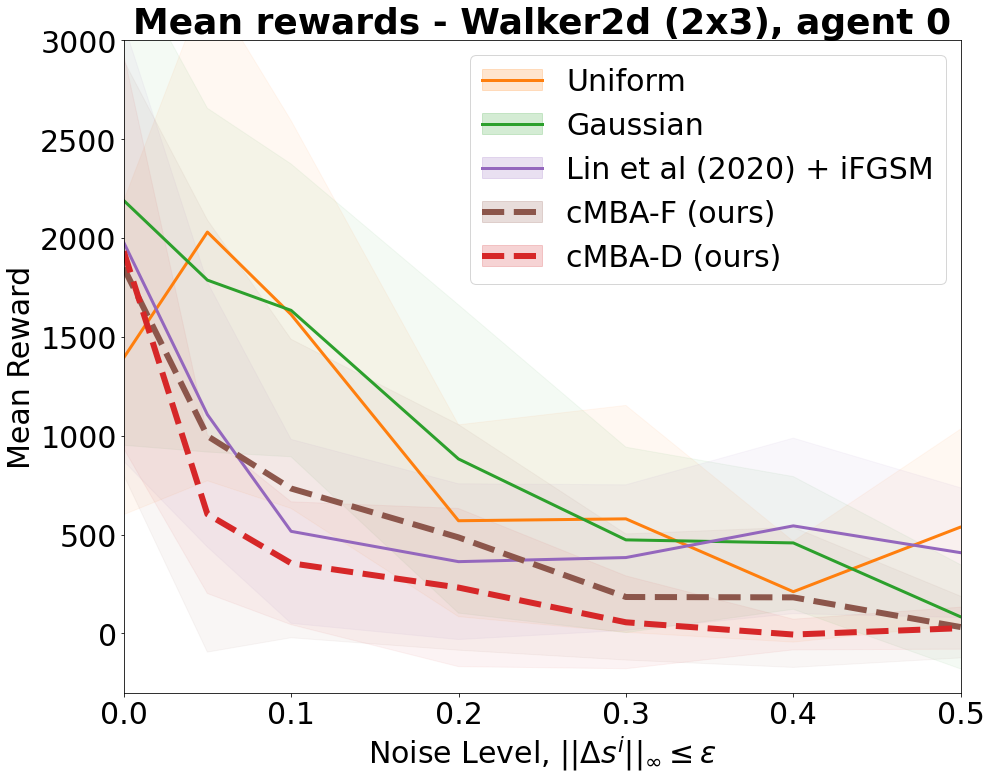

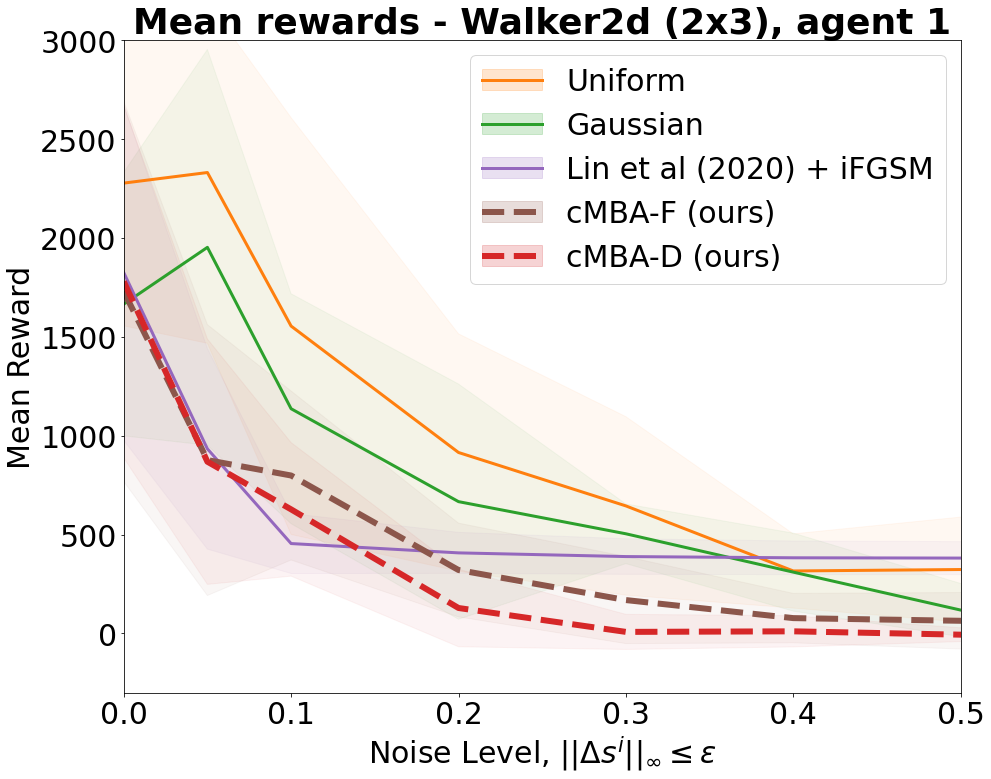

In [6]:
path_prefix = [
                'results/Walker_2x3/maddpg_adv_noise_linf_norm_uniform_walker2x3_agent', # adv noise uniform
                'results/Walker_2x3/maddpg_adv_noise_linf_norm_gaussian_walker2x3_agent', # gaussian noise
                'results/Walker_2x3/fgsm_atk_linf_norm_walker2x3_new_agent', # Lin et al. (2020) + iFGSM
                'results/Walker_2x3/maddpg_model_atk_fix_linf_norm_walker2x3_agent', # c-MBA-F
                'results/Walker_2x3/maddpg_model_atk_data_linf_norm_walker2x3_agent', # c-MBA-D
              ]

for agent in range(2):
    data_folder = [p+ str(agent) for p in path_prefix]


    legend = [
                r'Uniform',
                r'Gaussian',
                r'Lin et al (2020) + iFGSM',
                r'cMBA-F (ours)',
                r'cMBA-D (ours)',
             ]

    return_mean_list, return_std_list, adv_eps_list, eps_norms_info_list = get_atk_data(data_folder)

    title = r'Mean rewards - Walker2d (2x3), agent '+str(agent)

    f, lgd = plot_results_with_conf(return_mean_list, return_std_list, adv_eps_list, legend, 
                                      xlab='Noise Level, $||\Delta s^i||_{\infty} \leq \epsilon$', ylab='Mean Reward', title=title, alpha=0.05, xlim=0.5,
                                     ylim=[-300,3000], colors=['C1','C2','C4','C5','C3'],
                                     linestyle=['-','-','-','--','--'],
                                        linewidth=[3,3,3,6,6])

